# Predicting Housing Prices In Boston

## 1. Data exploration

1.1 - 1.2 are routine data analysis steps. I referred to the examples of other Kaggle users (e.g. ["Predicting Housing Prices EDA + ML"](https://www.kaggle.com/code/masghiff/predicting-housing-prices-eda-ml) by Ghifari Kusuma).

### 1.1 Loading the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/saina/Desktop/CS 365 V2/realtor-data.csv')

### 1.2 Summary statistics

In [3]:
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1401061,for_sale,NaN,NaN,155.00,Perrysburg,New York,14129.0,NaN,NaN,325000.0
1401062,for_sale,4.0,2.0,0.36,Silver Creek,New York,14136.0,2026.0,2000-09-01,187900.0
1401063,for_sale,10.0,4.0,0.43,Brocton,New York,14716.0,4802.0,1994-12-01,120000.0
1401064,for_sale,2.0,2.0,0.14,Dunkirk,New York,14048.0,1568.0,2003-04-15,92000.0


In [4]:
df.shape

(1401066, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401066 entries, 0 to 1401065
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1401066 non-null  object 
 1   bed             1184538 non-null  float64
 2   bath            1206853 non-null  float64
 3   acre_lot        1043599 non-null  float64
 4   city            1400875 non-null  object 
 5   state           1401066 non-null  object 
 6   zip_code        1400587 non-null  float64
 7   house_size      950954 non-null   float64
 8   prev_sold_date  714773 non-null   object 
 9   price           1400958 non-null  float64
dtypes: float64(6), object(4)
memory usage: 106.9+ MB


In [6]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,1.184538e+06,1.206853e+06,1.043599e+06,1.400587e+06,9.509540e+05,1.400958e+06
mean,3.392347e+00,2.487426e+00,3.215013e+01,8.356641e+03,2.178643e+03,8.186029e+05
std,2.051858e+00,1.873599e+00,1.249983e+03,4.130465e+03,3.492618e+03,2.683069e+06
min,1.000000e+00,1.000000e+00,0.000000e+00,6.010000e+02,4.000000e+00,0.000000e+00
25%,2.000000e+00,2.000000e+00,1.200000e-01,5.652000e+03,1.170000e+03,2.350000e+05
50%,3.000000e+00,2.000000e+00,3.200000e-01,8.757000e+03,1.700000e+03,4.467770e+05
75%,4.000000e+00,3.000000e+00,1.340000e+00,1.142600e+04,2.500000e+03,7.950000e+05
max,1.230000e+02,1.980000e+02,1.000000e+05,9.999900e+04,1.450112e+06,8.750000e+08


In [7]:
df.describe(include = 'object')

,status,city,state,prev_sold_date
count,1401066,1400875,1401066,714773
unique,2,3512,19,10319
top,for_sale,New York City,New York,2022-04-15
freq,1399134,61299,653061,734


In [8]:
def count_duplicates(df):
    num_dups = df.duplicated().sum()
    print(f'Found {num_dups} duplicated rows ({num_dups/len(df)*100:.2f}%).')

def count_percent_missing(df):
    percents_missing = round(df.isna().sum()/len(df)*100, 2)
    print('Percentage of Missing Data (%)')
    print(percents_missing)

In [9]:
count_duplicates(df)

Found 1249026 duplicated rows (89.15%).


In [10]:
count_percent_missing(df)

Percentage of Missing Data (%)
status             0.00
bed               15.45
bath              13.86
acre_lot          25.51
city               0.01
state              0.00
zip_code           0.03
house_size        32.13
prev_sold_date    48.98
price              0.01
dtype: float64


### 1.3 Filter the data

In [11]:
df = df[(df['city'] == 'Boston') & (df['state'] == 'Massachusetts')]

In [12]:
df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
100368,for_sale,1.0,1.0,NaN,Boston,Massachusetts,2132.0,708.0,1988-01-21,329000.0
100371,for_sale,1.0,1.0,0.02,Boston,Massachusetts,2135.0,688.0,2018-06-01,650000.0
100372,for_sale,2.0,1.0,0.03,Boston,Massachusetts,2130.0,1250.0,2007-08-30,739000.0
100373,for_sale,2.0,3.0,NaN,Boston,Massachusetts,2115.0,2226.0,NaN,4495000.0
100374,for_sale,9.0,3.0,0.09,Boston,Massachusetts,2131.0,3204.0,1998-08-06,1200000.0
...,...,...,...,...,...,...,...,...,...,...
245801,for_sale,3.0,2.0,NaN,Boston,Massachusetts,2135.0,1270.0,2004-09-02,639000.0
245917,for_sale,3.0,2.0,NaN,Boston,Massachusetts,2135.0,1235.0,NaN,1290000.0
245918,for_sale,1.0,1.0,NaN,Boston,Massachusetts,2135.0,450.0,NaN,588000.0
245919,for_sale,2.0,1.0,NaN,Boston,Massachusetts,2135.0,910.0,NaN,899000.0


In [13]:
df.shape

(31502, 10)

In [14]:
count_duplicates(df)

Found 30274 duplicated rows (96.10%).


In [15]:
count_percent_missing(df)

Percentage of Missing Data (%)
status             0.00
bed                5.00
bath               1.83
acre_lot          55.05
city               0.00
state              0.00
zip_code           0.00
house_size         1.40
prev_sold_date    60.29
price              0.00
dtype: float64


### 1.4 Dropping rows

In [16]:
df = df.drop_duplicates()
df.shape

(1228, 10)

In [17]:
count_percent_missing(df)

Percentage of Missing Data (%)
status             0.00
bed                5.05
bath               1.79
acre_lot          55.70
city               0.00
state              0.00
zip_code           0.00
house_size         1.38
prev_sold_date    60.83
price              0.00
dtype: float64


In [18]:
df = df.dropna(subset=['bed', 'bath', 'house_size'])
df.shape

(1166, 10)

In [19]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,1166.000000,1166.000000,515.000000,1166.000000,1166.000000,1.166000e+03
mean,3.102916,2.456261,4.530718,2129.089194,1833.052316,1.680617e+06
std,3.139073,2.152804,101.156560,31.929385,1784.709631,1.930530e+06
min,1.000000,1.000000,0.010000,2108.000000,335.000000,1.150000e+05
25%,2.000000,1.000000,0.020000,2116.000000,905.750000,6.750000e+05
50%,2.000000,2.000000,0.040000,2125.000000,1300.000000,9.490000e+05
75%,3.000000,3.000000,0.100000,2129.000000,2216.500000,1.800000e+06
max,60.000000,51.000000,2295.680000,2467.000000,38442.000000,2.000000e+07


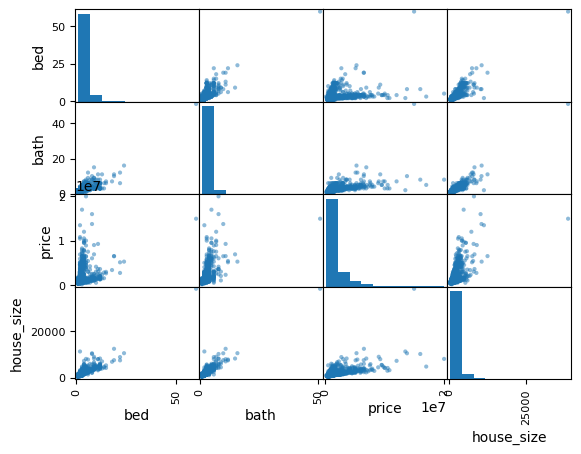

In [20]:
pd.plotting.scatter_matrix(df[['bed', 'bath', 'price', 'house_size']]) 
plt.show()

In [21]:
def drop_outliers(df, cols):
    # Credit to the Kaggle user Ghifari Kusuma for this elegant code block.
    # https://www.kaggle.com/code/masghiff/predicting-housing-prices-eda-ml
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    return df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

df = drop_outliers(df, ['house_size'])

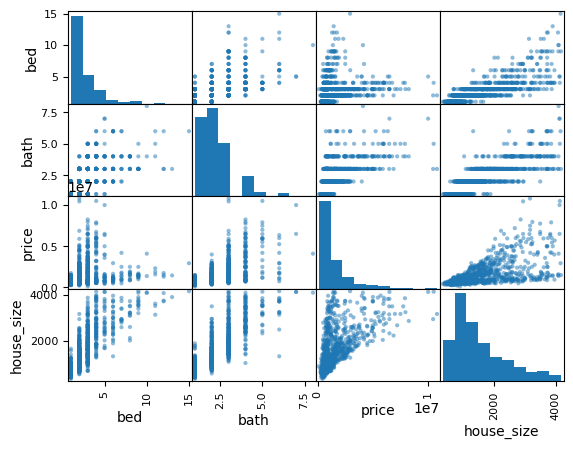

In [22]:
pd.plotting.scatter_matrix(df[['bed', 'bath', 'price', 'house_size']]) 
plt.show()

## 2 Model construction

In [23]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [24]:
X = df[['bed', 'bath', 'house_size']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

def print_metrics(y_test, y_pred):
    print('R^2:', r2_score(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

### 2.1 Ordinary Least Squares

In [25]:
from sklearn.linear_model import LinearRegression

model_ols = LinearRegression().fit(X_train, y_train)
y_pred = model_ols.predict(X_test)

print('Training Data:')
print_metrics(y_train, model_ols.predict(X_train))
print()
print('Testing Data:')
print_metrics(y_test, y_pred)

Training Data:
R^2: 0.6185548072423969
MSE: 816634322195.527
RMSE: 903678.2182810024
MAPE: 0.49819751298052584

Testing Data:
R^2: 0.5373774045429143
MSE: 738317729958.2246
RMSE: 859254.1707540468
MAPE: 0.538532034756097


In [26]:
print("Coefficients:", model_ols.coef_)
print("Intercept:", model_ols.intercept_)

Coefficients: [-583643.79594824  386621.01283381    1540.83763011]
Intercept: -191172.82155824266


<Figure size 800x600 with 0 Axes>

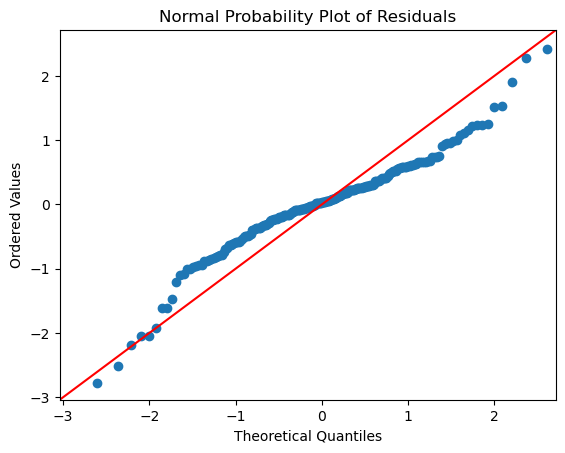

In [27]:
import statsmodels.api as sm

y_test_standardized = (y_test - np.mean(y_test)) / np.std(y_test)
y_pred_standardized = (y_pred - np.mean(y_pred)) / np.std(y_pred)

plt.figure(figsize=(8, 6))
sm.qqplot(y_test_standardized - y_pred_standardized, line ='45') 
plt.title('Normal Probability Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

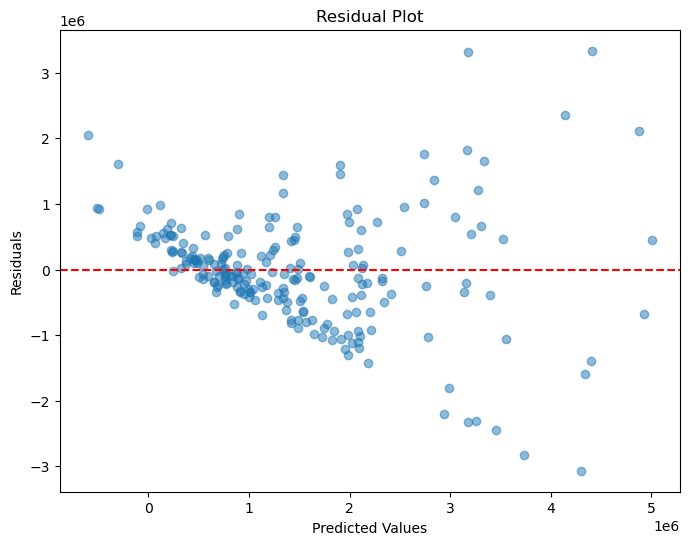

In [28]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### 2.2 Extra Trees

In [29]:
from sklearn.ensemble import ExtraTreesRegressor

model_ET = ExtraTreesRegressor().fit(X_train, y_train)
y_pred = model_ET.predict(X_test)

print('Training Data:')
print_metrics(y_train, model_ET.predict(X_train))
print()
print('Testing Data:')
print_metrics(y_test, y_pred)

Training Data:
R^2: 0.988064273948983
MSE: 25553142990.52599
RMSE: 159853.5047802393
MAPE: 0.03212610372232642

Testing Data:
R^2: 0.29196356962695935
MSE: 1129983392800.4504
RMSE: 1063006.7698751737
MAPE: 0.4800637789801939


### 2.3 Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
y_pred = model_DT.predict(X_test)

print('Training Data:')
print_metrics(y_train, model_DT.predict(X_train))
print()
print('Testing Data:')
print_metrics(y_test, y_pred)

Training Data:
R^2: 0.9880642753328326
MSE: 25553140027.84843
RMSE: 159853.49551338697
MAPE: 0.03211427698401268

Testing Data:
R^2: 0.18564302462598736
MSE: 1299664563162.3953
RMSE: 1140028.3168248038
MAPE: 0.48558172163458824


### 2.4 Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Trial and error shows ~70 estimators is sufficient
model_RF = RandomForestRegressor(n_estimators=70, random_state=0).fit(X_train, y_train)
y_pred = model_RF.predict(X_test)

print('Training Data:')
print_metrics(y_train, model_RF.predict(X_train))
print()
print('Testing Data:')
print_metrics(y_test, y_pred)

Training Data:
R^2: 0.9469037517810884
MSE: 113673522431.64969
RMSE: 337155.04212698597
MAPE: 0.16052942388602656

Testing Data:
R^2: 0.4035433053464398
MSE: 951908871593.0499
RMSE: 975658.1735387911
MAPE: 0.44449264695859303


### 2.5 KNN

In [32]:
from sklearn.neighbors import KNeighborsRegressor

model_KN = KNeighborsRegressor().fit(X_train, y_train)
y_pred = model_KN.predict(X_test)

print('Training Data:')
print_metrics(y_train, model_KN.predict(X_train))
print()
print('Testing Data:')
print_metrics(y_test, y_pred)

Training Data:
R^2: 0.528527723080098
MSE: 1009372907580.8142
RMSE: 1004675.523530266
MAPE: 0.4694824002322012

Testing Data:
R^2: 0.08431614338365201
MSE: 1461376147674.759
RMSE: 1208873.9171951553
MAPE: 0.6026585279594515


### 2.6 KNN with scaling

In [33]:
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()

df_scaled['house_size'] = StandardScaler().fit_transform(df_scaled['house_size'].values.reshape(len(df_scaled), 1))
df_scaled['price'] = StandardScaler().fit_transform(df_scaled['price'].values.reshape(len(df_scaled), 1))
df_scaled['bed'] = StandardScaler().fit_transform(df_scaled['bed'].values.reshape(len(df_scaled), 1))
df_scaled['bath'] = StandardScaler().fit_transform(df_scaled['bath'].values.reshape(len(df_scaled), 1))

X = df_scaled[['bed', 'bath', 'house_size']]
y = df_scaled['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model_KN = KNeighborsRegressor().fit(X_train, y_train)
y_pred = model_KN.predict(X_test)

print('Training Data:')
print_metrics(y_train, model_KN.predict(X_train))
print()
print('Testing Data:')
print_metrics(y_test, y_pred)

Training Data:
R^2: 0.7598152959978083
MSE: 0.253058264650033
RMSE: 0.5030489684414758
MAPE: 1.3540959485292965

Testing Data:
R^2: 0.4306574161887644
MSE: 0.4471670774939505
RMSE: 0.6687055237501411
MAPE: 1.5049580434524432


## 3 Clustering

### 3.1 Two-Variable Clustering

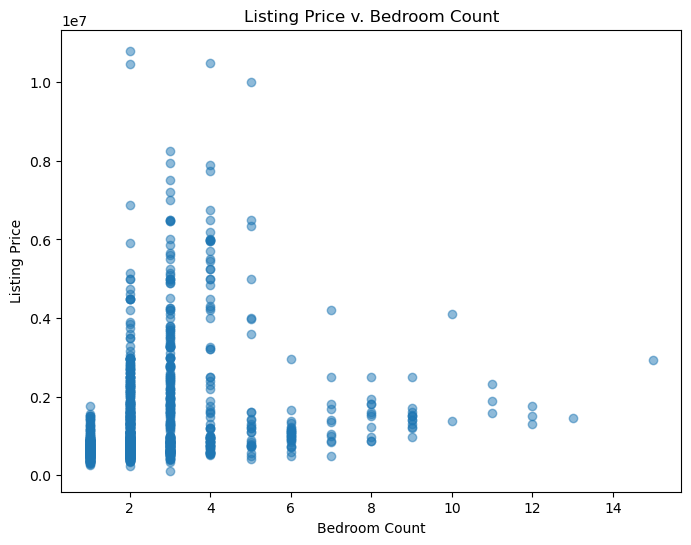

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bed'], df['price'], alpha=0.5)
plt.title('Listing Price v. Bedroom Count')
plt.xlabel('Bedroom Count')
plt.ylabel('Listing Price')
plt.show()

In [35]:
# I learned this procedure from
# https://www.datacamp.com/tutorial/k-means-clustering-python

from sklearn.cluster import KMeans
from sklearn import preprocessing

data = df[['bed', 'price']]

data_norm = preprocessing.normalize(data)

kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(data_norm)

C:\Users\saina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=0)

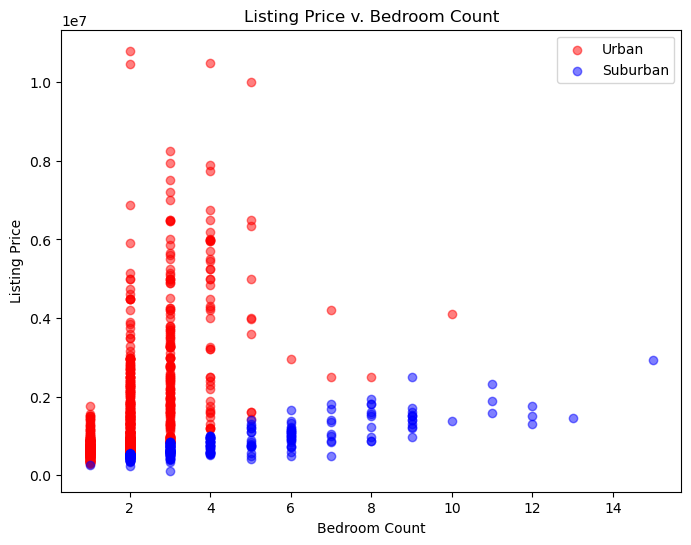

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(df['bed'][kmeans.labels_ == 0], df['price'][kmeans.labels_ == 0], color='red', alpha=0.5, label='Urban')
plt.scatter(df['bed'][kmeans.labels_ == 1], df['price'][kmeans.labels_ == 1], color='blue', alpha=0.5, label='Suburban')
plt.title('Listing Price v. Bedroom Count')
plt.xlabel('Bedroom Count')
plt.ylabel('Listing Price')
plt.legend()
plt.show()

### 3.2 Four-Variable Clustering

In [37]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

data = df[['bed', 'bath', 'house_size', 'price']]

data_norm = preprocessing.normalize(data)

kmeans = KMeans(n_clusters = 2, random_state = 0, n_init='auto')
kmeans.fit(data_norm)

C:\Users\saina\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto', random_state=0)

In [38]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 1])

In [40]:
df['label'] = kmeans.labels_

# ChatGPT helped me with the pandas API here
cluster_counts = df.groupby(['zip_code', 'label']).size().unstack(fill_value=0)
cluster_percentages = cluster_counts.div(cluster_counts.sum(axis=1), axis=0) * 100
sample_sizes = df['zip_code'].value_counts()

result = pd.concat([cluster_percentages, sample_sizes], axis=1)
result.columns = ['Urban (%)', 'Suburban (%)', 'N']

result.index = result.index.map(lambda x: f"{int(x):05d}")

result[['Urban (%)', 'Suburban (%)']] = result[['Urban (%)', 'Suburban (%)']].round(2)
result = result.sort_values(by='N', ascending=False)

print(result)

          Urban (%)  Suburban (%)    N
zip_code                              
02118        100.00          0.00  128
02128         74.04         25.96  104
02127         93.94          6.06   99
02116        100.00          0.00   90
02135         75.00         25.00   72
02125         35.29         64.71   51
02129        100.00          0.00   48
02130         70.83         29.17   48
02114         97.78          2.22   45
02110        100.00          0.00   43
02210         97.56          2.44   41
02124         16.67         83.33   36
02131         12.50         87.50   32
02111         96.43          3.57   28
02119         39.29         60.71   28
02115        100.00          0.00   23
02132         30.43         69.57   23
02134         76.19         23.81   21
02108        100.00          0.00   20
02136          0.00        100.00   19
02113         94.12          5.88   17
02109        100.00          0.00   15
02122         20.00         80.00   15
02215        100.00      